# This notebook we will compare the binding pattern in different RBPs

In [1]:
from metadensity.metadensity import *
from metadensity.plotd import *
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/hsher/Metadensity/scripts')
from dataloader import *

Using:  /home/hsher/gencode_coords/gencode.v33.transcript.gff3


# Load encode metadata
I have precompiled list of uID and the .bam, .bigWig files in the following dataframe.

`minus_0` is the bigWig file for `minus` strand for replicate `0`. The files are in `/home/hsher/seqdata/eclip_raw`. You don't need to specify all of them. The eCLIP object will take care of them.

# load RBPs into eCLIP object

I build an eCLIP object that will connect all .bam, .bigWig and .bed (for IDR peaks, individual peaks) together. All you need to do is point a row of the previous dataframe, and use `RBP_centric_approach()` to compute the regions for metagene, and find positive (transcripts with IDR) and negative (transcript w/o any peaks) examples. Building the object will take a while (~1 min) since a lot of I/O.

In [2]:
HNRNPC = eCLIP.from_series(encode_data.loc[(encode_data['RBP'] == 'HNRNPC')&(encode_data['Cell line'] == 'HepG2')].iloc[0],
                          single_end = False)

In [3]:
RPS3 = eCLIP.from_series(encode_data.loc[(encode_data['RBP'] == 'RPS3')&(encode_data['Cell line'] == 'HepG2')].iloc[0],
                        single_end = False)

In [4]:
RBFOX2 = eCLIP.from_series(encode_data.loc[(encode_data['RBP'] == 'RBFOX2')&(encode_data['Cell line'] == 'HepG2')].iloc[0],
                          single_end = False)

In [5]:
LIN28B = eCLIP.from_series(encode_data.loc[(encode_data['RBP'] == 'LIN28B')&(encode_data['Cell line'] == 'HepG2')].iloc[0],
                          single_end = False)

# Calulcate Density and Truncation sites
Object `Metatruncation` and `Metadensity` takes three things:
1. an experiment object `eCLIP` or `STAMP`.
2. a set of transcript pyBedTools that you want to plot on
3. name of the object

Options include:
1. `sample_no=` allows you to decide how many transcript you want to build the density. It will take longer. By default, `sample_no=200`. So in transcript if you give more than 200 transcripts, only 200 will be used
2. `metagene` allows you to use pre-built metagene. This feature is more useful when you want to compare the same set of RNA over many RBPs.
3. `background_method` handles how you want to deal with IP v.s. Input
4. `normalize` handles how you want to normalize values within a transcript.

## Difference between truncation and density

`Metadensity` represents read coverage. `Metatruncation` represents the 5' end of read 2 for `eCLIP`; edit sites for `STAMP`.

In [6]:
# here for the set of transcript, we use the IDR peak containing transcript assuming they have good signal
def build_idr_metadensity(eCLIP):
    ''' build metadensity object for eCLIP and its idr peak containing transcript'''
    m = Metadensity(eCLIP, eCLIP.name,background_method = 'subtract', normalize = True)
    m.get_density_array()
    return m
def build_idr_metatruncate(eCLIP):
    ''' build metadensity object for eCLIP and its idr peak containing transcript'''
    m = Metatruncate(eCLIP, eCLIP.name,background_method = 'subtract', normalize = True)
    m.get_density_array(use_truncation = True)
    return m

In [7]:
# this step takes some time for building metagene from the annotation files.
HNRNPC_den = build_idr_metadensity(HNRNPC)
RPS3_den = build_idr_metadensity(RPS3)
RBFOX2_den = build_idr_metadensity(RBFOX2)
LIN28B_den = build_idr_metadensity(LIN28B)

HNRNPC_trun = build_idr_metatruncate(HNRNPC)
RPS3_trun = build_idr_metatruncate(RPS3)
RBFOX2_trun = build_idr_metatruncate(RBFOX2)
LIN28B_trun = build_idr_metatruncate(LIN28B)

Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene


/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/metadensity.py:607: RuntimeWarning: Mean of empty slice
  feature_average  = np.nanmean(np.stack(all_feature_values), axis = 0)


Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene


/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/metadensity.py:607: RuntimeWarning: Mean of empty slice
  feature_average  = np.nanmean(np.stack(all_feature_values), axis = 0)


Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene


/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/metadensity.py:607: RuntimeWarning: Mean of empty slice
  feature_average  = np.nanmean(np.stack(all_feature_values), axis = 0)


Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene


/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/metadensity.py:607: RuntimeWarning: Mean of empty slice
  feature_average  = np.nanmean(np.stack(all_feature_values), axis = 0)


need at least one array to concatenate
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene


/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/metadensity.py:607: RuntimeWarning: Mean of empty slice
  feature_average  = np.nanmean(np.stack(all_feature_values), axis = 0)


Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene


/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/metadensity.py:607: RuntimeWarning: Mean of empty slice
  feature_average  = np.nanmean(np.stack(all_feature_values), axis = 0)


Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene


/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/metadensity.py:607: RuntimeWarning: Mean of empty slice
  feature_average  = np.nanmean(np.stack(all_feature_values), axis = 0)


Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene


/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/metadensity.py:607: RuntimeWarning: Mean of empty slice
  feature_average  = np.nanmean(np.stack(all_feature_values), axis = 0)


need at least one array to concatenate


# Visualize RBP map: individual density per transcript

In [8]:
from metadensity.plotd import *

In [9]:
### PLOT INDIVIDUAL DENSITY
# you can customize the list of features you want to show. This is suitable when you are looking for splicing
#f = plot_rbp_map([HNRNPC_den,  RBFOX2_den, RPS3_den,LIN28B_den], features_to_show = generic_RNA)

In [10]:
### PLOT INDIVIDUAL TRUNCATION SITES

#f = plot_rbp_map([HNRNPC_trun,  RBFOX2_trun, RPS3_trun,LIN28B_trun], features_to_show = generic_RNA)

# Median and Mean density

In [11]:
plt.style.use('seaborn-white')

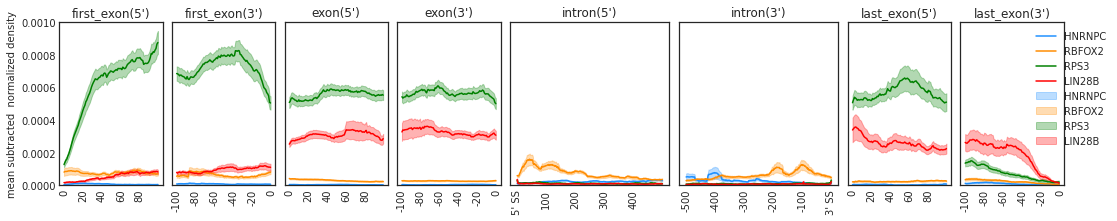

In [12]:
color_dict = {'HNRNPC':'dodgerblue', 'RBFOX2':'darkorange', 'RPS3':'green', 'LIN28B':'red'}
%matplotlib inline
f=plot_mean_density([HNRNPC_den, RBFOX2_den, RPS3_den, LIN28B_den], 
                    features_to_show = generic_rna, ymax = 0.001,
                   color_dict = color_dict)

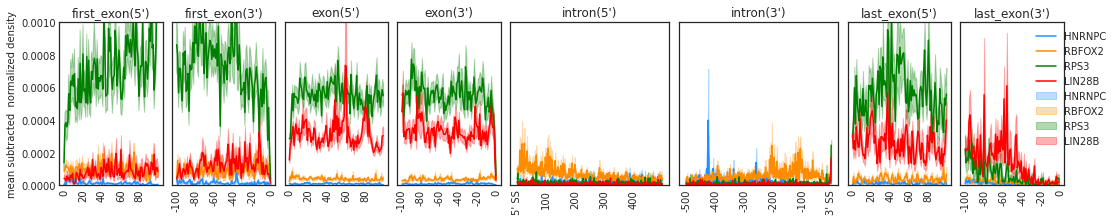

In [13]:
f=plot_mean_density([HNRNPC_trun, RBFOX2_trun, RPS3_trun, LIN28B_trun],
                    features_to_show = generic_rna, ymax = 0.001,
                   color_dict = color_dict)

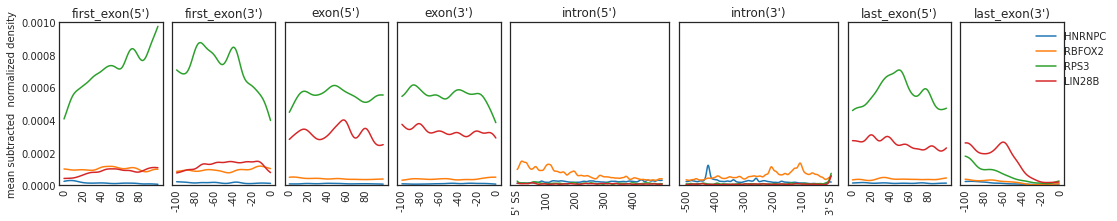

In [14]:
# you can smooth if you find spiky truncation density ugly :-\
f=plot_mean_density([HNRNPC_trun, RBFOX2_trun, RPS3_trun, LIN28B_trun], features_to_show = generic_rna, ymax = 0.001, smooth = True)

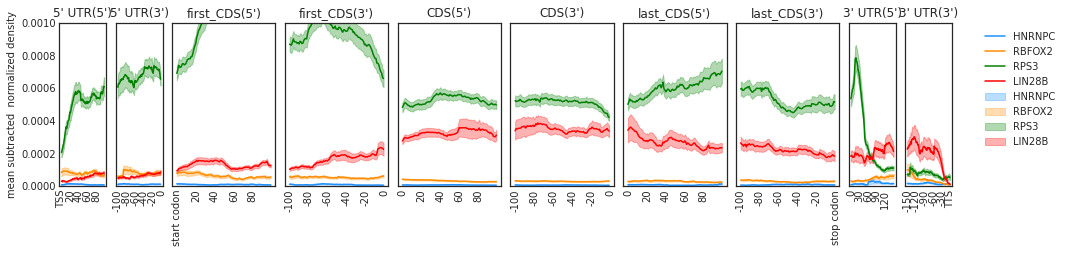

In [15]:

f=plot_mean_density([HNRNPC_den, RBFOX2_den, RPS3_den, LIN28B_den], features_to_show = protein_coding, ymax = 0.001, color_dict = color_dict)

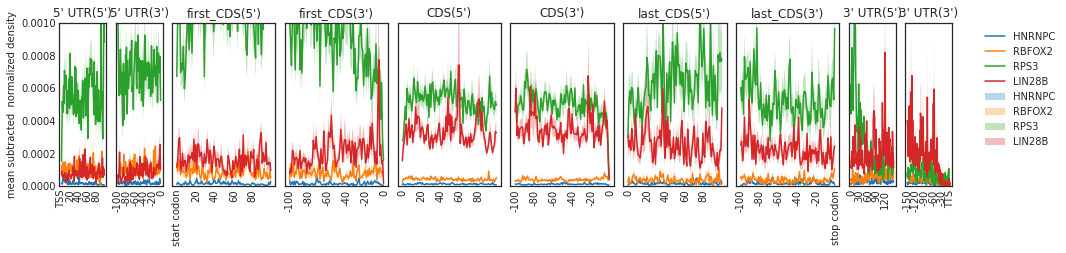

In [16]:

f=plot_mean_density([HNRNPC_trun, RBFOX2_trun, RPS3_trun, LIN28B_trun], features_to_show = protein_coding, ymax = 0.001)

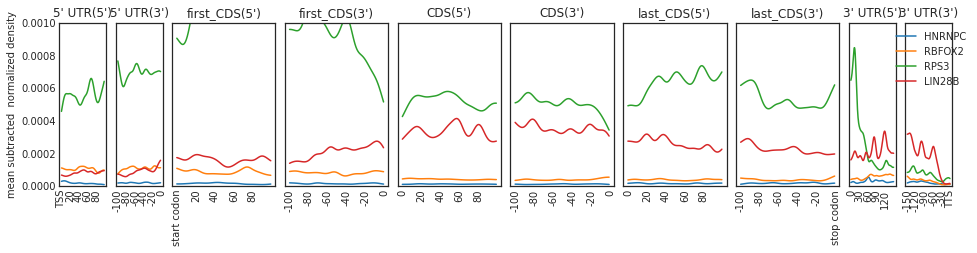

In [17]:

f=plot_mean_density([HNRNPC_trun, RBFOX2_trun, RPS3_trun, LIN28B_trun], features_to_show = protein_coding, smooth = True, ymax = 0.001)